In [75]:
import pickle
import matplotlib.pyplot as plt
import pandas as pd

In [76]:
raw_features_pkl_filepath = './MELD_features/MELD_features_raw.pkl'

In [77]:
videoIDs, videoSpeakers, videoLabels, videoText, \
    videoAudio, videoSentence, trainVid, testVid, vids = pickle.load(open(raw_features_pkl_filepath, 'rb'))

Basic statistics of the dataset

In [78]:
import numpy as np
print(f"Total number of videos\t: {len(videoIDs)}")
print(f'Number of train videos\t: {len(trainVid)}')
print(f'Number of test videos\t: {len(testVid)}')


n = list(videoIDs.keys())
utt = 0
for i in n:
    utt += len(videoIDs[i])

print(f'Total number of utterances in {len(n)} videos\t: {utt}')
print(f'Average number of utterances in one video\t: {utt/len(n)}')

Total number of videos	: 1432
Number of train videos	: 1152
Number of test videos	: 280
Total number of utterances in 1432 videos	: 13708
Average number of utterances in one video	: 9.572625698324023


Distribution of labels

<Axes: xlabel='label'>

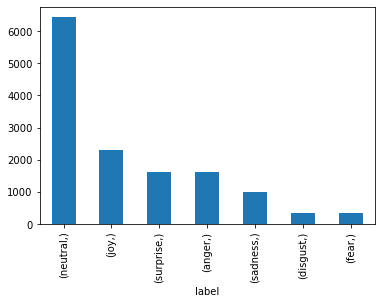

In [79]:
labels = []
for i in list(videoLabels.values()):
    labels.extend(i)
    
labels_df = pd.DataFrame(labels, columns=['label'])

labels_map = {0: 'neutral', 1: 'surprise', 
              2: 'fear', 3: 'sadness',
              4: 'joy', 5: 'disgust', 6: 'anger'}

def map_label(orig):
    return labels_map[orig]

labels_df['label'] = labels_df['label'].apply(map_label)

labels_df.value_counts().plot(kind='bar')

Printing some random conversation

In [ ]:
def map_speakers_to_int(videoSpeakers):
    unique_speakers = {}
    speaker_id = 1  # Start numbering speakers from 1

    # Assign a unique integer to each unique speaker vector
    for speaker_vector in videoSpeakers:
        
        # Convert the vector to a tuple to use it as a key in the dictionary
        speaker_tuple = tuple(speaker_vector)
        if speaker_tuple not in unique_speakers:
            unique_speakers[speaker_tuple] = speaker_id
            speaker_id += 1

    return unique_speakers, len(unique_speakers)

In [129]:
random_idx = np.random.randint(0, len(videoIDs))
print(f'Random conversation #{random_idx}')

speakers, unique_speakers = map_speakers_to_int(videoSpeakers[random_idx])

print(f'Speakers in the video : {unique_speakers}\n')
for i, j, k in zip(videoSentence[random_idx], videoSpeakers[random_idx], videoLabels[random_idx]):
    print(f'Speaker {speakers[tuple(j)]} ({labels_map[k]}) \t:\t {i}')

Random conversation #1410
Speakers in the video : 2

Speaker 1 (neutral) 	:	 Oh, yeah, yeah, sure. We live in the building by the uh sidewalk.
Speaker 2 (surprise) 	:	 You know it?
Speaker 1 (neutral) 	:	 Hey, look, since we're neighbors and all, what do you say we uh, get together for a drink?
Speaker 2 (neutral) 	:	 Oh, sure, they love us over there.
Speaker 1 (joy) 	:	 Ben! Ben! Ben!
